In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Prepare data and labels
data = []
result = []

# Read pneumonia images
for r, d, f in os.walk(r'C:\Users\pirat\Downloads\pneumonia 2-20240125T203918Z-001\classification\pneumonia'):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file))
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))
                result.append(0)  # Label 0 for pneumonia

# Read normal images
for r, d, f in os.walk(r"C:\Users\pirat\Downloads\pneumonia 2-20240125T203918Z-001\classification\normal"):
    for file in f:
        if '.jpg' in file:
            img = Image.open(os.path.join(r, file))
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(np.array(img))
                result.append(1)  # Label 1 for normal

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
# Convert to numpy arrays
data = np.array(data)
result = np.array(result)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [7]:
model.compile(loss='binary_crossentropy', optimizer='Adamax', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
27/27 [==============================] - 22s 727ms/step - loss: 11.4765 - accuracy: 0.7535 - val_loss: 3.9082 - val_accuracy: 0.6667
Epoch 2/10
27/27 [==============================] - 18s 688ms/step - loss: 3.8292 - accuracy: 0.7721 - val_loss: 3.9862 - val_accuracy: 0.8056
Epoch 3/10
27/27 [==============================] - 19s 693ms/step - loss: 2.1180 - accuracy: 0.8349 - val_loss: 1.8619 - val_accuracy: 0.7685
Epoch 4/10
27/27 [==============================] - 19s 695ms/step - loss: 1.4737 - accuracy: 0.8302 - val_loss: 1.6272 - val_accuracy: 0.7870
Epoch 5/10
27/27 [==============================] - 19s 724ms/step - loss: 1.0154 - accuracy: 0.8698 - val_loss: 2.7305 - val_accuracy: 0.8056
Epoch 6/10
27/27 [==============================] - 21s 792ms/step - loss: 0.6571 - accuracy: 0.9000 - val_loss: 1.8168 - val_accuracy: 0.7963
Epoch 7/10
27/27 [==============================] - 19s 705ms/step - loss: 0.2560 - accuracy: 0.9349 - val_loss: 1.5149 - val_accuracy: 0.787

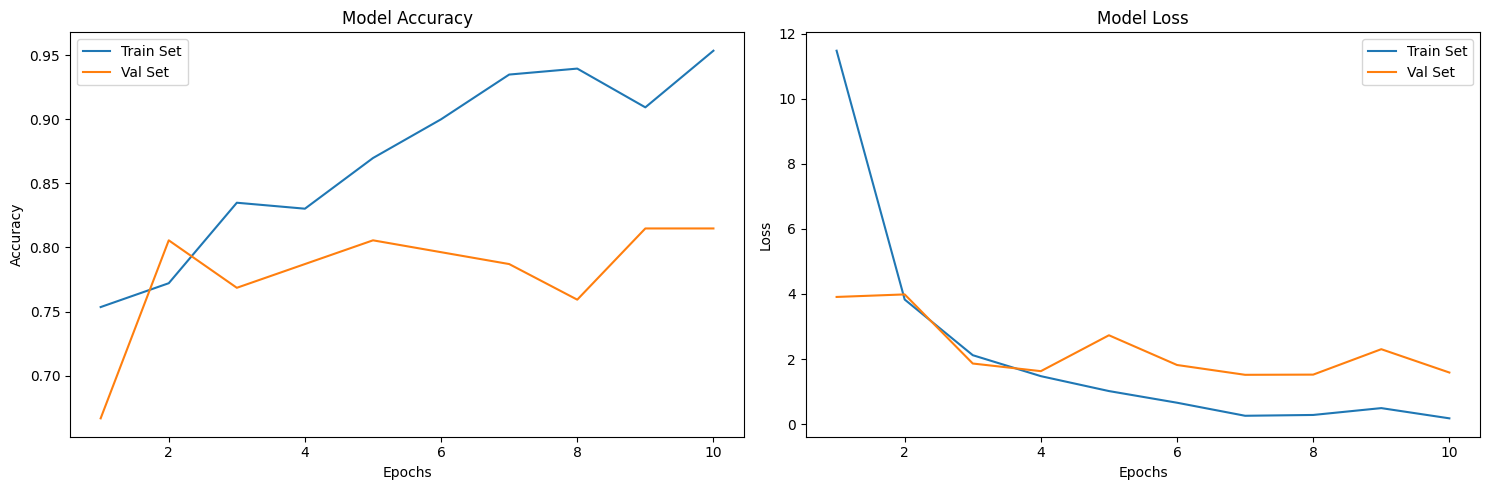

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()